# Fraudulent Provider Dataset Construction (PART 3)
## STEP 1
* Resolve Any Matching Issues and Map Identified Providers to NPI
* Create Fraudulent Provider Listing

In [2]:
# Import Pyhon libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from easydict import EasyDict as edict
import ast

In [3]:
# Load NPPES Results 
df_nppes_results = pd.read_csv('nppes_results.csv')
df_nppes_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   result_count  856 non-null    int64 
 1   results       856 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.5+ KB


In [4]:
df_nppes_results.shape

(856, 2)

In [5]:
df_nppes_results.head(5)

,result_count,results
0,1,"{'enumeration_type': 'NPI-1', 'number': 117453..."
1,1,"{'enumeration_type': 'NPI-1', 'number': 100316..."
2,1,"{'enumeration_type': 'NPI-1', 'number': 108317..."
3,1,"{'enumeration_type': 'NPI-1', 'number': 100345..."
4,1,"{'enumeration_type': 'NPI-1', 'number': 116483..."


Text(0, 0.5, 'Record Count')

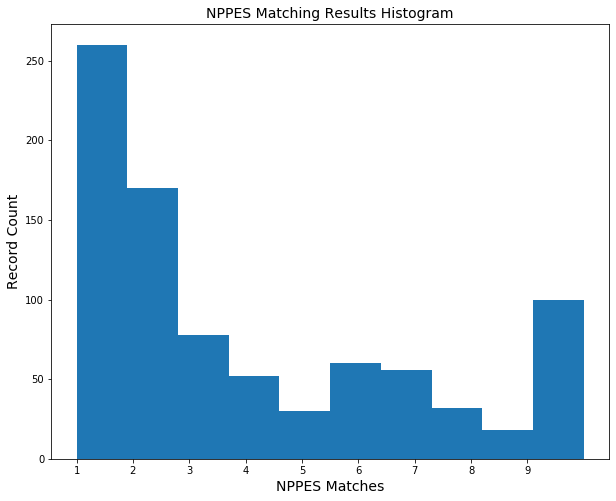

In [11]:
# Histogram of NPPES matching results 
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df_nppes_results['result_count'], bins=10)
ax.set_xticks(range(1,10,1))
ax.set_title('NPPES Matching Results Histogram', fontsize=14)
ax.set_xlabel('NPPES Matches', fontsize=14)
ax.set_ylabel('Record Count', fontsize=14)

In [12]:
# Filter NPPES results for direct matches only
# NOTE: To be removed in Part 4 and NPI resolution will be improved 
df_hits = df_nppes_results.loc[df_nppes_results['result_count'] == 1].reset_index()
df_hits

,index,result_count,results
0,0,1,"{'enumeration_type': 'NPI-1', 'number': 117453..."
1,1,1,"{'enumeration_type': 'NPI-1', 'number': 100316..."
2,2,1,"{'enumeration_type': 'NPI-1', 'number': 108317..."
3,3,1,"{'enumeration_type': 'NPI-1', 'number': 100345..."
4,4,1,"{'enumeration_type': 'NPI-1', 'number': 116483..."
...,...,...,...
255,842,1,"{'enumeration_type': 'NPI-1', 'number': 132638..."
256,843,1,"{'enumeration_type': 'NPI-1', 'number': 121539..."
257,846,1,"{'enumeration_type': 'NPI-1', 'number': 131650..."
258,847,1,"{'enumeration_type': 'NPI-1', 'number': 131650..."


In [19]:
# Retrieve NPI from stored JSON output of NPPES API Call
nppes_output = df_hits.to_dict('records')

df_identified_provider = pd.DataFrame()

for i in nppes_output:
    api_results = i.get("results")
    my_dict = ast.literal_eval(api_results)
    
    df_identified_provider = df_identified_provider.append({'fraudulent_npi': str(my_dict.get('number'))}, ignore_index=True)
    
df_identified_provider['fraudulent_npi']

0      1174533772
1      1003165838
2      1083172589
3      1003455163
4      1164837811
          ...    
255    1326380908
256    1215398037
257    1316504640
258    1316504640
259    1174919948
Name: fraudulent_npi, Length: 260, dtype: object

In [22]:
# Output file with fraudulent NPIs
df_identified_provider.to_csv('fraudulent_npi.csv', index=False)